# Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)


### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.


Looping trhough polynomials up to 14 with 18: 100%|██████████| 14/14 [00:00<00:00, 30.33it/s]


Elapsed time 477.9298ms in function bootstrap


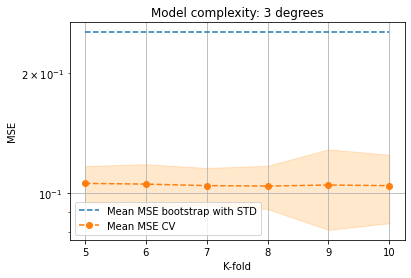

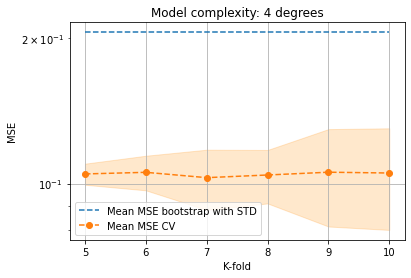

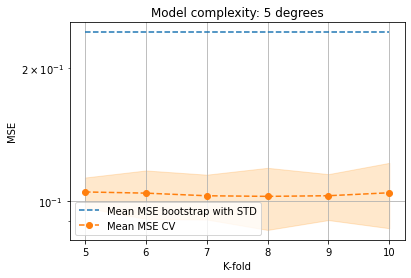

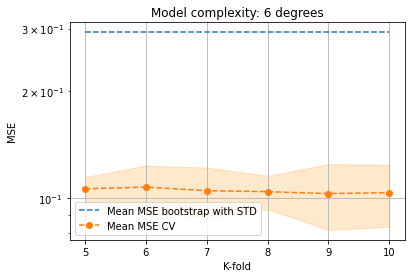

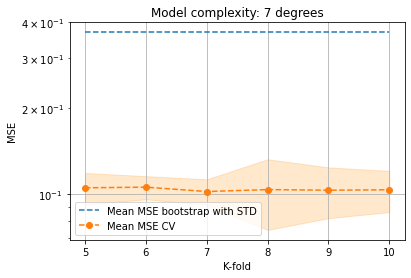

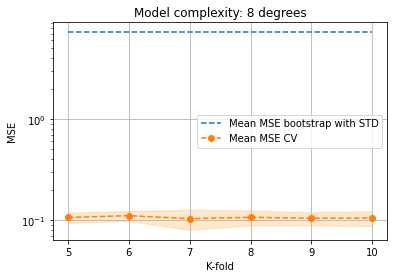

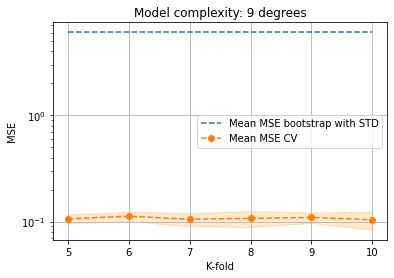

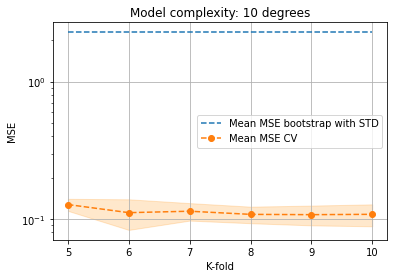

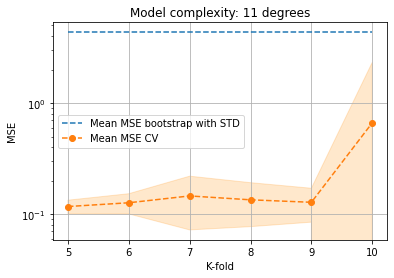

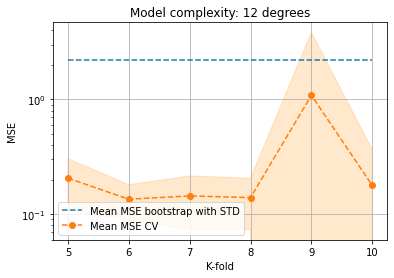

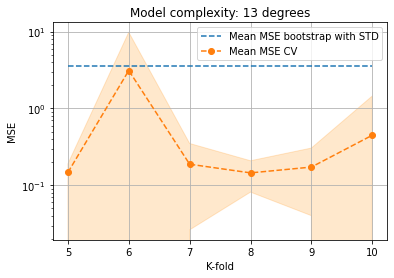

In [1]:
import numpy as np
from common import *
from sklearn.model_selection import cross_val_score
from sklearn import linear_model


#generate some data:
SEED_VALUE = np.random.seed(4155)
n = 22
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
x,y = np.meshgrid(x,y)
t = FrankeFunction(x, y) + noise_factor(n, factor=0.3)
ndegrees = 14

boot_strp_MSE_test, _, _, _ = bootstrap(x, y, t, ndegrees, n - int(n/5), OLS(), SEED_VALUE)

for degree in range(3,14):
    X = create_X(x,y,degree)
    X = remove_intercept(X)

    mean_folds_error = np.zeros(6)
    mse_std_arr = np.zeros(6)
    for folds in range(5,11):
     
        implemented_scores = cross_val_OLS(k = folds, model = "OLS", X = X, z = t, shuffle=True, random_state=SEED_VALUE)
        mean_folds_error[folds-5] = np.mean(implemented_scores)
        mse_std_arr[folds-5] = np.std(implemented_scores)
        
        
    plt.semilogy(np.arange(5,11), np.ones(6)*boot_strp_MSE_test[degree],"--", label ="Mean MSE bootstrap with STD")
    plt.semilogy(np.arange(5,11), mean_folds_error, "o--",  label = "Mean MSE CV")
    plt.fill_between(np.arange(5,11), mean_folds_error-mse_std_arr, mean_folds_error+mse_std_arr,  alpha = 0.2, color = "darkorange")
    plt.title(f"Model complexity: {degree} degrees")
    plt.xlabel("K-fold")
    plt.ylabel("MSE")
    #plt.ylim(0,2)
    plt.xticks(np.arange(5,11))
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{REPORT_FIGURES}{EX3}mse_cv_boot{degree}.pdf")

    plt.show()

### Compare MSE from CV with bootstrap: 

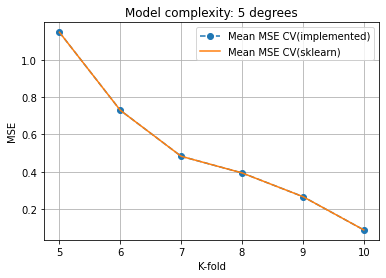

In [2]:
import numpy as np
from common import *
from sklearn.model_selection import cross_val_score
from sklearn import linear_model


#generate some data: 
SEED_VALUE = np.random.seed(4155)
n = 10
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
x,y = np.meshgrid(x,y)
t = FrankeFunction(x, y) + noise_factor(n, factor=0.1)

degree = 5

X = create_X(x,y,degree)

mean_folds_error = np.zeros(6)
mean_folds_error_sk = np.zeros(6)
mse_std_arr = np.zeros(6)
for folds in range(5,11):
    #create LinearRegression model object from SK to use in sk.cross_val_score
    sk_model = linear_model.LinearRegression()
    #Get scores from SK crossval:
    sk_scores = cross_val_score(sk_model, X, t.ravel(), cv=folds, scoring = "neg_mean_squared_error")

    implemented_scores = cross_val_OLS(k = folds, model = "OLS", X = X, z = t)
    
    sk_scores = sk_scores*-1
    mean_folds_error[folds-5] = np.mean(implemented_scores)
    mean_folds_error_sk[folds-5] = np.mean(sk_scores)
    mse_std_arr[folds-5] = np.std(implemented_scores)
    
plt.plot(np.arange(5,11), mean_folds_error, "o--",  label = "Mean MSE CV(implemented)")
plt.plot(np.arange(5,11), mean_folds_error_sk, label = "Mean MSE CV(sklearn)")
plt.title(f"Model complexity: {degree} degrees")
plt.xlabel("K-fold")
plt.ylabel("MSE")
plt.xticks(np.arange(5,11))
plt.grid(True)
plt.legend()
plt.savefig(f"{REPORT_FIGURES}{EX3}sk_vs_implemented_CV.pdf")

plt.show()